Collatz beta combinations notebook

In [1]:
"""
This notebook tests if different combinations of betas lead to a whole number.
"""

# Imports
from math import log2
import itertools
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Configuration
K_FACTOR = 3
MAX_ITERATIONS = 600
PRINT_TABLE = True
MAX_ODD = 21
LOG_MODE = False

EXPORT_DATA = True
DATA_PATH = Path.cwd().parent.as_posix() + "/data/"
CSV_PATH = DATA_PATH + "beta_combinations.csv"

# Generate and analyse data
odds = pd.Series(range(1, MAX_ODD, 2))

permutations = list(itertools.product(odds, odds, odds))

analysis_frame = pd.DataFrame(
    permutations, columns=["v1", "v2", "v3"])

# analysis_frame = analysis_frame[analysis_frame["v1"] != analysis_frame["v2"]]
# analysis_frame = analysis_frame[analysis_frame["v1"] != analysis_frame["v3"]]
# analysis_frame = analysis_frame[analysis_frame["v2"] != analysis_frame["v3"]]

n = 3
analysis_frame["i"] = analysis_frame.index + 1
analysis_frame["n"] = n
analysis_frame["kn"] = K_FACTOR**n
analysis_frame["beta1"] = 1 + 1/ (K_FACTOR * analysis_frame["v1"])
analysis_frame["beta2"] = 1 + 1/ (K_FACTOR * analysis_frame["v2"])
analysis_frame["beta3"] = 1 + 1/ (K_FACTOR * analysis_frame["v3"])
analysis_frame["beta_prod"] = \
    analysis_frame["beta1"] * analysis_frame["beta2"] * analysis_frame["beta3"]

analysis_frame["alpha1"] = (analysis_frame["v1"] * K_FACTOR + 1) / analysis_frame["v2"]
analysis_frame["alpha1"] = analysis_frame["alpha1"].apply(log2)
analysis_frame["alpha2"] = (analysis_frame["v2"] * K_FACTOR + 1) / analysis_frame["v3"]
analysis_frame["alpha2"] = analysis_frame["alpha2"].apply(log2)
analysis_frame["alpha_sum"] = analysis_frame["alpha1"] + analysis_frame["alpha2"]

analysis_frame["beta_kn"] = analysis_frame["beta_prod"] * analysis_frame["kn"]
analysis_frame["valid"] = analysis_frame["alpha_sum"] % 1 == 0

if LOG_MODE:
    analysis_frame["v1"] = analysis_frame["v1"].apply(log2)
    analysis_frame["v2"] = analysis_frame["v2"].apply(log2)
    analysis_frame["v3"] = analysis_frame["v3"].apply(log2)
    analysis_frame["kn"] = analysis_frame["kn"].apply(log2)
    analysis_frame["beta1"] = analysis_frame["beta1"].apply(log2)
    analysis_frame["beta2"] = analysis_frame["beta2"].apply(log2)
    analysis_frame["beta3"] = analysis_frame["beta3"].apply(log2)
    analysis_frame["beta_prod"] = analysis_frame["beta_prod"].apply(log2)
    analysis_frame["beta_kn"] = analysis_frame["beta_prod"] + analysis_frame["kn"]    

# Filter implausible values
# analysis_frame = analysis_frame[analysis_frame["alpha1"] >= 1]
# analysis_frame = analysis_frame[analysis_frame["alpha2"] >= 1]

# Print data
kn1 = float(analysis_frame.head(1)["kn"])

print_frame = analysis_frame[[
    "n", "v1", "v2", "v3", "beta1", "alpha1", "beta2", "beta3", 
    "beta_prod", "beta_kn", "alpha_sum", "valid"
]]

print(" K:", K_FACTOR, 
      " Kn:", kn1,
      "\n")

if PRINT_TABLE:
    print(print_frame.to_string(index=False), "\n")
    

 K: 3  Kn: 27.0 

 n  v1  v2  v3     beta1    alpha1     beta2     beta3  beta_prod    beta_kn  alpha_sum  valid
 3   1   1   1  1.333333  2.000000  1.333333  1.333333   2.370370  64.000000   4.000000   True
 3   1   1   3  1.333333  2.000000  1.333333  1.111111   1.975309  53.333333   2.415037  False
 3   1   1   5  1.333333  2.000000  1.333333  1.066667   1.896296  51.200000   1.678072  False
 3   1   1   7  1.333333  2.000000  1.333333  1.047619   1.862434  50.285714   1.192645  False
 3   1   1   9  1.333333  2.000000  1.333333  1.037037   1.843621  49.777778   0.830075  False
 3   1   1  11  1.333333  2.000000  1.333333  1.030303   1.831650  49.454545   0.540568  False
 3   1   1  13  1.333333  2.000000  1.333333  1.025641   1.823362  49.230769   0.299560  False
 3   1   1  15  1.333333  2.000000  1.333333  1.022222   1.817284  49.066667   0.093109  False
 3   1   1  17  1.333333  2.000000  1.333333  1.019608   1.812636  48.941176  -0.087463  False
 3   1   1  19  1.333333  2.0000

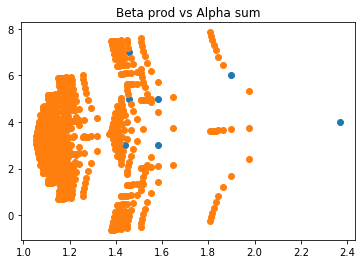

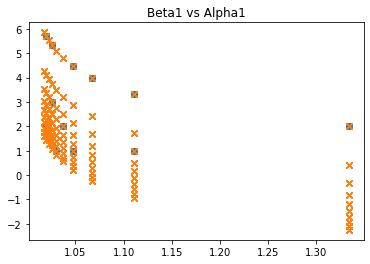

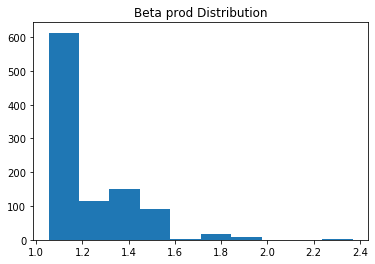

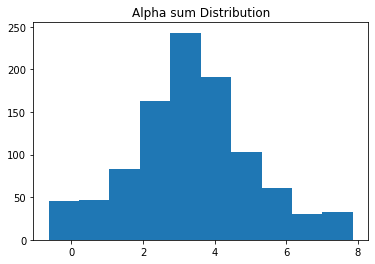

In [2]:
# Plot results
valid = analysis_frame[analysis_frame["valid"] == True]
non_valid = analysis_frame[analysis_frame["valid"] == False]

plt.figure()
plt.title("Beta prod vs Alpha sum")
plt.plot(valid["beta_prod"], valid["alpha_sum"],  "o")
plt.plot(non_valid["beta_prod"], non_valid["alpha_sum"], "o")

plt.figure()
plt.title("Beta1 vs Alpha1")
plt.plot(valid["beta1"], valid["alpha1"],  "o")
plt.plot(non_valid["beta1"], non_valid["alpha1"], "x")

plt.figure()
plt.title("Beta prod Distribution")
plt.hist(analysis_frame["beta_prod"], bins=10)

plt.figure()
plt.title("Alpha sum Distribution")
plt.hist(analysis_frame["alpha_sum"], rwidth=1)

plt.show()

In [3]:
# Export results

# Export data
if EXPORT_DATA:
    analysis_frame.to_csv(CSV_PATH, index=False)